<a href="https://colab.research.google.com/github/RifqiMakarim/MachineLearning_Asah_Dicoding/blob/main/CaseStudy_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans , DBSCAN
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('/content/drive/MyDrive/FOR GO-COLAB/Data_mallCustomer/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


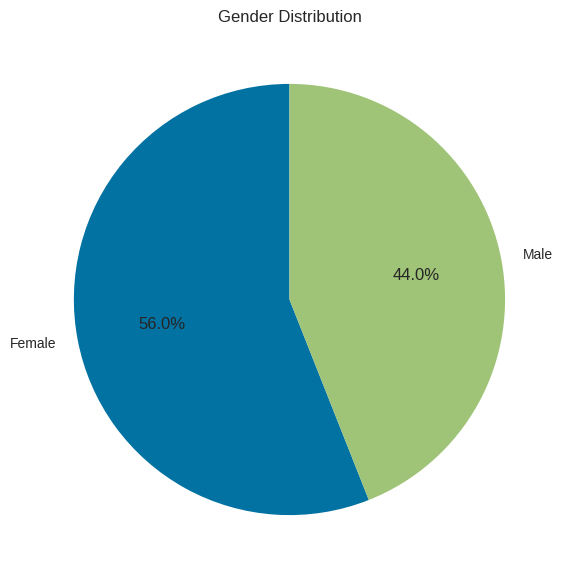

In [7]:
#  EDA ( Exploratory Data Analusis )
plt.figure(figsize=(7,7))
plt.pie(df['Gender'].value_counts(), labels=['Female','Male'], autopct='%1.1f%%' , startangle=90)
plt.title('Gender Distribution')
plt.show()

Analisis distribusi data usia pelanggan , kita mengelompokkan usia ke dalam beberapa kategori dan menghitung jumlah pelanggan setiap kategori tersebut.


Usia dibagi menjadi lima kategori ;
- 18-25
- 26-35
- 36-45
- 46-55
- 55 lebih

Setelah menghitung jumlah pelanggan pada setiap kategori, data tersebut digunakan untuk membuat diagram batang (bar chart) yang menunjukkan distribusi usia pelanggan.

Proses ini disebut sebagai binning. Ini adalah teknik untuk mengelompokkan nilai-nilai numerik ke dalam interval atau kategori yang disebut bins.


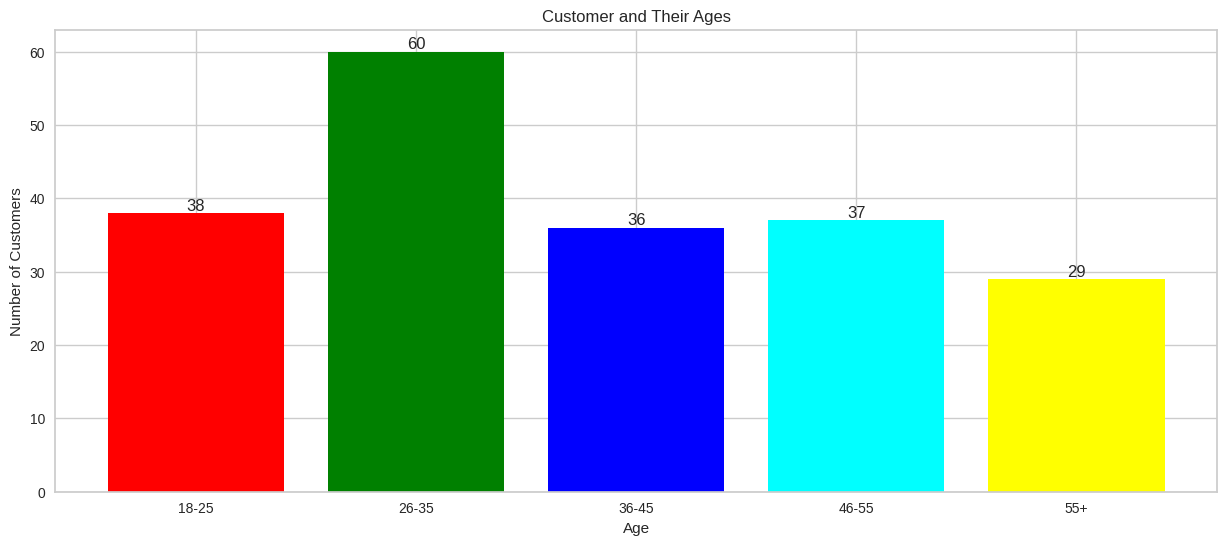

In [8]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(x)):
  plt.text(i,y[i],y[i], ha='center', va='bottom')

plt.show()

1. 18–25 tahun: ada 38 pelanggan dalam rentang usia ini.
2. 26–35 tahun: kategori ini memiliki jumlah pelanggan terbanyak, yaitu 60.
3. 36–45 tahun: ada 36 pelanggan dalam rentang usia ini.
4. 46–55 tahun: ada 37 pelanggan yang termasuk dalam kategori ini.
5. 55 tahun ke atas: rentang usia ini memiliki 29 pelanggan.

Untuk menganalisis distribusi pendapatan tahunan pelanggan, kita mengelompokkan pendapatan ke dalam beberapa kategori dan menghitung jumlah pelanggan pada setiap kategori. Pendapatan tahunan dikelompokkan ke dalam lima rentang.

1. $0–30,000

2. $30,001–60,000

3. $60,001–90,000

4. $90,001–120,000

5. $120,001–150,000

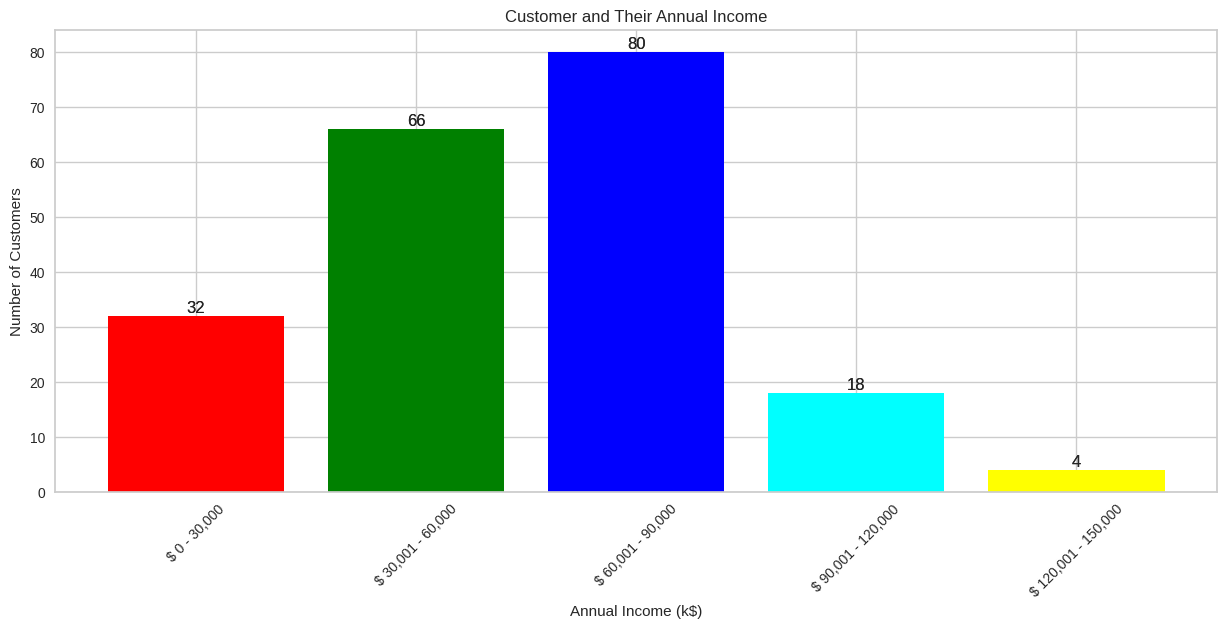

In [9]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Annual Income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customers")

# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i,aiy[i],aiy[i], ha='center', va='bottom')

# Memutar label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menambahkan label jumlah pelanggan diatas setiap bar
for i in range(len(aix)):
  plt.text(i,aiy[i],aiy[i], ha='center', va='bottom')

plt.show()

Data Splitting
- Kita mengambil dua kolom dari dataset Annual Income (k$) dan Spending Score (1-100)



In [10]:
# Mengambil kolom 'Annual Income (k$)' dan 'Spending Score (1-100)' dari dataset dan menyimpannya dalam array X
X = df.iloc[:, [3, 4]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


Elbow Method
-
- Sebelum melanjutkan ke pembangunan model clustering, kita perlu menentukan jumlah cluster yang optimal untuk data kita. Untuk itu, kita akan menggunakan metode elbow method. Metode ini berfungsi seperti "cenayang" yang membantu kita memilih jumlah cluster terbaik dengan melihat perubahan total within-cluster sum of squares (WCSS) saat jumlah cluster bertambah.

- Dengan menggunakan elbow method, kita akan menggambar grafik WCSS terhadap jumlah cluster dan mencari "siku" pada grafik tersebut. Titik letak penurunan WCSS mulai melambat, atau sikunya, biasanya menunjukkan jumlah cluster yang optimal. Ini membantu kita menghindari overfitting dengan memilih jumlah cluster yang sesuai dengan struktur data.

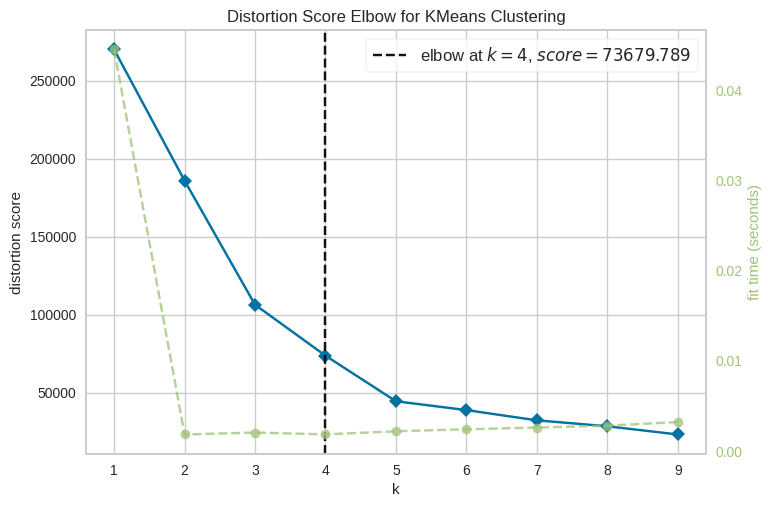

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
kmeans = KMeans()

# Visualizer KElbow untuk memnentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1,10))

# Fit Visualizer dengan data
visualizer.fit(X)

visualizer.show()


Hasil analisis metode elbow menunjukkan bahwa jumlah cluster optimal adalah 4 dengan nilai total within-cluster sum of squares (WCSS) sebesar 73,679.789. Ini berarti bahwa membagi data menjadi 4 cluster memberikan keseimbangan terbaik antara meminimalkan jarak di dalam cluster dan memaksimalkan jarak antar cluster.

Cluster Modeling ( K-Means Clustering )
-
---


In [12]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_
k = 4

# Fungsi untuk analisis karakteristik cluster
def analyze_cluster(X, labels, k):
  print("Analisis Karakteristik setiap cluster: ")
  for cluster_id in range(k):

    # Mengambil data untuk cluster saat ini
    cluster_data = X[labels == cluster_id]

    # Rata - rata untuk setiap fitur dalam cluster
    mean_income = cluster_data[:, 0].mean()
    mean_spending_score = cluster_data[:, 1].mean()

    print(f"Cluster {cluster_id + 1}:")
    print(f"Rata - rata pendapatan tahunan: {mean_income: .2f}")
    print(f"Rata - rata skor pengeluaran: {mean_spending_score: .2f}")

# Analisis
analyze_cluster(X, labels, k)

Analisis Karakteristik setiap cluster: 
Cluster 1:
Rata - rata pendapatan tahunan:  48.26
Rata - rata skor pengeluaran:  56.48
Cluster 2:
Rata - rata pendapatan tahunan:  86.54
Rata - rata skor pengeluaran:  82.13
Cluster 3:
Rata - rata pendapatan tahunan:  87.00
Rata - rata skor pengeluaran:  18.63
Cluster 4:
Rata - rata pendapatan tahunan:  26.30
Rata - rata skor pengeluaran:  20.91


Selanjutnya kita akan melakukan visualisasi hasil clustering yang telah dilakukan dengan model KMeans serta menampilkan posisi centroid dari setiap cluster. Pertama, kita menentukan posisi centroid dengan menggunakan atribut **cluster_centers_** dari model KMeans.

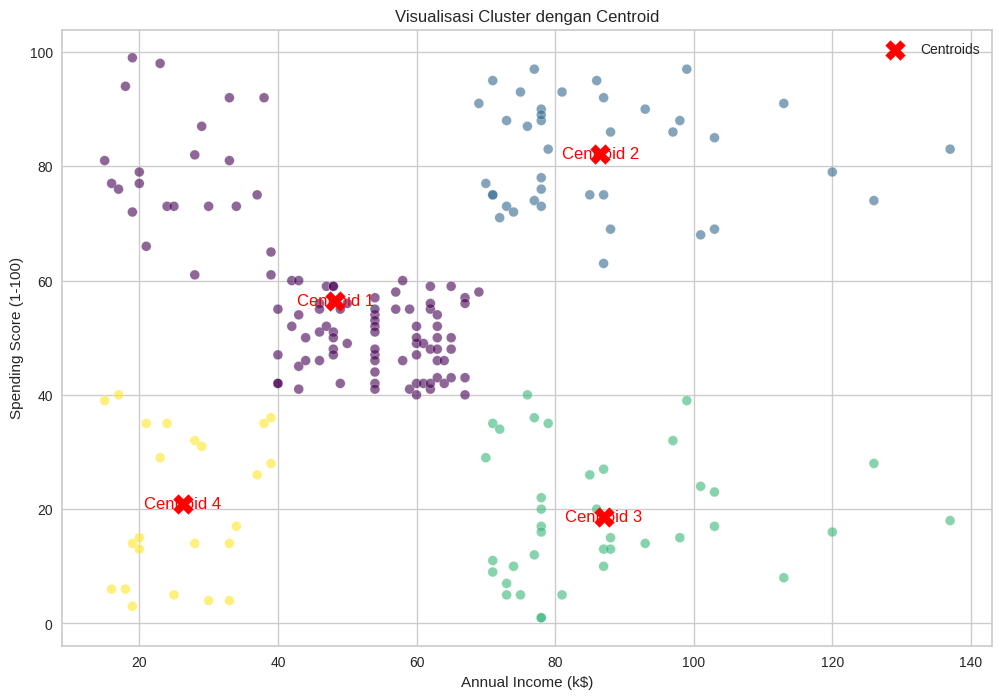

Nilai Centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [18]:

# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
  plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
  print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

Nilai centroid untuk setiap cluster sebagai berikut.

- Centroid 1: pendapatan tahunan $48,260 serta skor belanja 56.48 menunjukkan pelanggan dengan pendapatan menengah dan belanja tinggi.

- Centroid 2: pendapatan tahunan $86,540 serta skor belanja 82.13 menggambarkan pelanggan dengan pendapatan tinggi dan belanja intensif.

- Centroid 3: pendapatan tahunan $87,000 serta skor belanja 18.63 menunjukkan pelanggan berpendapatan tinggi dan berbelanja sedikit.

- Centroid 4: pendapatan tahunan $26,300 serta skor belanja 20.91 menunjukkan pelanggan dengan pendapatan dan belanja rendah.